In [1]:
### Generate ROC analysis and visualization in Google Colab with Python
# Import df.bl data, generated in R, from my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import df.bl.csv as df
import pandas as pd
df = pd.read_csv("drive/MyDrive/df_bl.csv")

     Variable       AUC    CI Low   CI High       p-value
0         PHS  0.745767  0.679785  0.804959  3.522717e-12
1      GAP.43  0.646074  0.582089  0.707649  3.571702e-05
2  PLASMA_NFL  0.699483  0.642022  0.757027  1.649564e-08
3    ABETA.bl  0.844093  0.797588  0.887439  1.162110e-22
4      TAU.bl  0.794686  0.738822  0.840241  7.450301e-17
5     PTAU.bl  0.819573  0.768167  0.865632  1.510324e-19


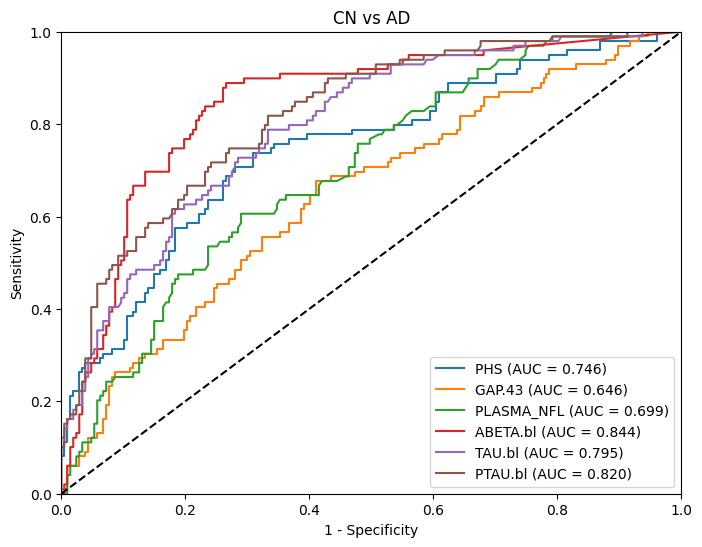

In [5]:
## CN vs AD ROC test with Baseline data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'AD'])]

results = []

variables = ['PHS', 'GAP.43', 'PLASMA_NFL', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_AD.tsv', sep='\t', index=False)


     Variable       AUC    CI Low   CI High       p-value
0         PHS  0.637147  0.590520  0.679673  5.898442e-08
1      GAP.43  0.505939  0.459401  0.554916  8.145620e-01
2  PLASMA_NFL  0.550088  0.503285  0.600512  4.770517e-02
3    ABETA.bl  0.652085  0.606600  0.697759  1.505869e-09
4      TAU.bl  0.567099  0.520557  0.615190  7.989934e-03
5     PTAU.bl  0.580073  0.533215  0.627649  1.548645e-03


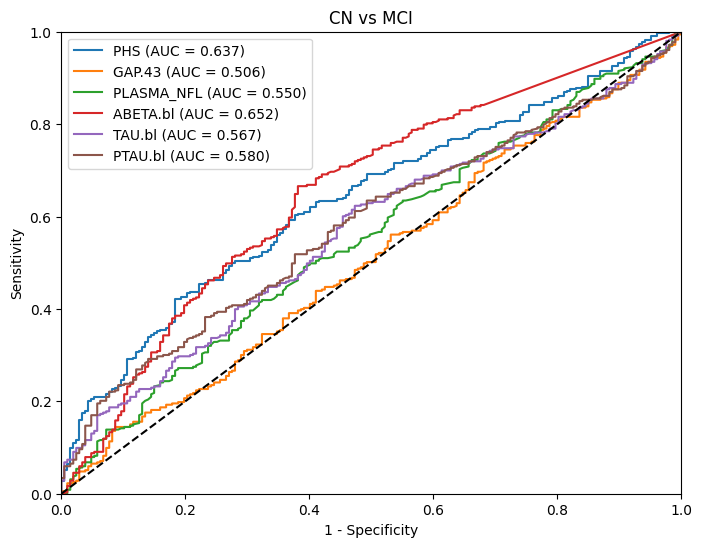

In [6]:
## CN vs MCI ROC test with Baseline data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'MCI'])]

results = []

variables = ['PHS', 'GAP.43', 'PLASMA_NFL', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs MCI')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_MCI.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_MCI.tsv', sep='\t', index=False)


     Variable       AUC    CI Low   CI High       p-value
0         PHS  0.610410  0.550285  0.670475  7.824961e-04
1      GAP.43  0.637837  0.573480  0.696803  2.747820e-05
2  PLASMA_NFL  0.644419  0.587474  0.702243  1.114360e-05
3    ABETA.bl  0.746187  0.693052  0.797741  6.437748e-14
4      TAU.bl  0.714725  0.658231  0.763532  6.454220e-11
5     PTAU.bl  0.721378  0.666516  0.770713  1.636546e-11


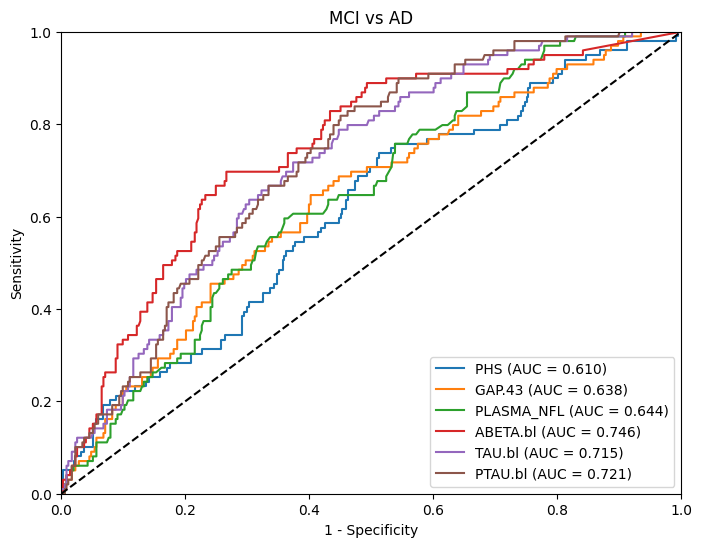

In [7]:
## MCI vs AD ROC test with Baseline data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['MCI', 'AD'])]

results = []

variables = ['PHS', 'GAP.43', 'PLASMA_NFL', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('MCI vs AD')
plt.legend()
plt.grid(False)
plt.savefig('ROC_MCI_AD.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_MCI_AD.tsv', sep='\t', index=False)


['AD&MCI' 'CN']
     Variable       AUC    CI Low   CI High       p-value
0         PHS  0.660938  0.617160  0.703406  3.186314e-11
1      GAP.43  0.536633  0.487250  0.585872  1.308647e-01
2  PLASMA_NFL  0.582810  0.536315  0.631339  6.371153e-04
3    ABETA.bl  0.694140  0.654148  0.736734  9.339548e-16
4      TAU.bl  0.616947  0.571535  0.663270  1.412252e-06
5     PTAU.bl  0.632530  0.585897  0.675726  4.603353e-08


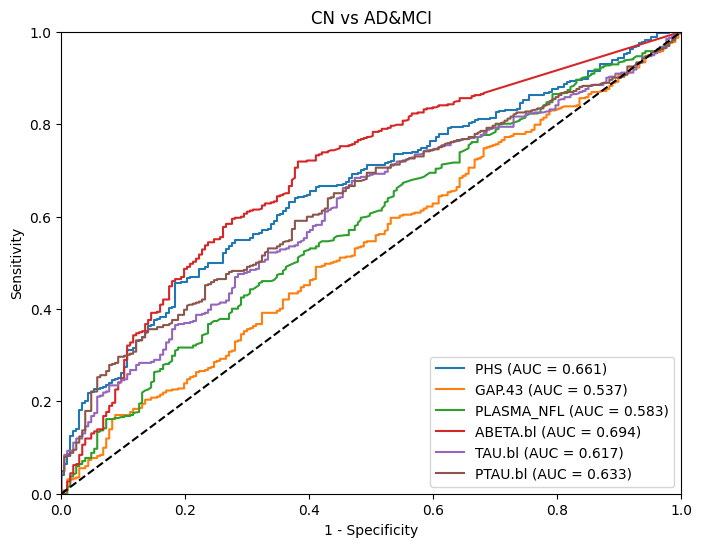

In [11]:
## CN vs AD&MCI ROC test with Baseline data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_C_AM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43', 'PLASMA_NFL', 'PTGENDER', 'APOE4', 'DX']].copy()
df_C_AM['DX'] = df_C_AM['DX'].replace(['MCI', 'AD'], 'AD&MCI')
unique_values = df_C_AM['DX'].unique()
print(unique_values)

df_C_AM_filtered = df_C_AM[df_C_AM['DX'].isin(['CN', 'AD&MCI'])]

results = []

variables = ['PHS', 'GAP.43', 'PLASMA_NFL', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'CN'][variable]
    ad_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'AD&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_C_AM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_C_AM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD&MCI')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD&MCI.pdf', format='pdf')
plt.show()

# Save the table 
results_df_C_AM.to_csv('/content/ROC_CN_AD&MCI.tsv', sep='\t', index=False)


['CN&MCI' 'AD']
     Variable       AUC    CI Low   CI High       p-value
0         PHS  0.660444  0.601694  0.719916  3.512461e-07
1      GAP.43  0.640882  0.583054  0.697052  7.728147e-06
2  PLASMA_NFL  0.664773  0.611682  0.715745  1.684828e-07
3    ABETA.bl  0.782377  0.734559  0.825480  2.332133e-19
4      TAU.bl  0.744282  0.694733  0.791720  8.804156e-15
5     PTAU.bl  0.757675  0.710560  0.801065  2.823293e-16


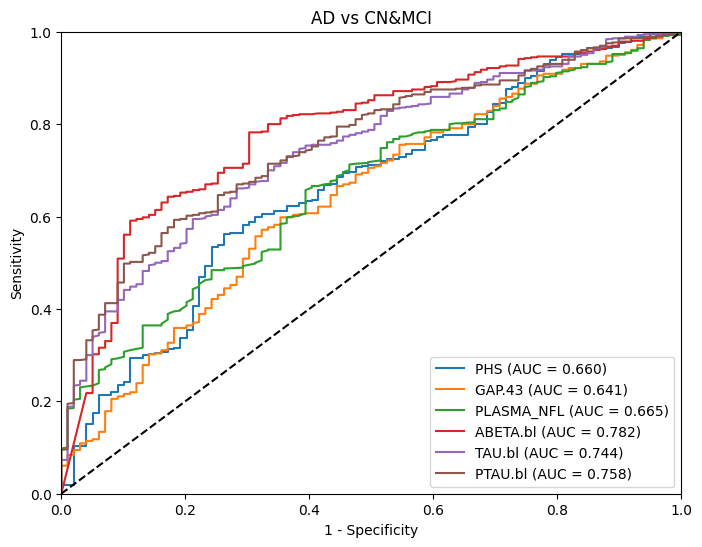

In [15]:
## AD vs CN&MCI ROC test with Baseline data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_A_CM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43', 'PLASMA_NFL', 'PTGENDER', 'APOE4', 'DX']].copy()
df_A_CM['DX'] = df_A_CM['DX'].replace(['MCI', 'CN'], 'CN&MCI')
unique_values = df_A_CM['DX'].unique()
print(unique_values)

df_A_CM_filtered = df_A_CM[df_A_CM['DX'].isin(['AD', 'CN&MCI'])]

results = []

variables = ['PHS', 'GAP.43', 'PLASMA_NFL', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'AD'][variable]
    ad_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'CN&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_A_CM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_A_CM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('AD vs CN&MCI')
plt.legend()
plt.grid(False)
plt.savefig('ROC_AD_CN&MCI.pdf', format='pdf')
plt.show()

# Save the table 
results_df_A_CM.to_csv('/content/ROC_AD_CN&MCI.tsv', sep='\t', index=False)


In [16]:
# Donload tables and plots on local machine
from google.colab import files

files.download('/content/ROC_MCI_AD.tsv')
files.download('/content/ROC_MCI_AD.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
files.download('/content/ROC_AD_CN&MCI.tsv')
files.download('/content/ROC_AD_CN&MCI.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
files.download('/content/ROC_CN_AD&MCI.tsv')
files.download('/content/ROC_CN_AD&MCI.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
files.download('/content/ROC_CN_AD.tsv')
files.download('/content/ROC_CN_AD.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
files.download('/content/ROC_CN_MCI.tsv')
files.download('/content/ROC_CN_MCI.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>